In [22]:
import os
import glob
import pandas as pd

# Set the directory where to start the search
base_dir = '../../assets/nyc/'

# Pattern to match the files
pattern = '**/reviews.csv.gz'

# Initialize an empty list to hold all dataframes
dfs = []

# Use glob to find all files that match the pattern
for filepath in glob.iglob(os.path.join(base_dir, pattern), recursive=True):
    # Read the gzipped CSV file into a pandas DataFrame
    df = pd.read_csv(filepath, compression='gzip')
    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate all dataframes into a single one
combined_df = pd.concat(dfs, ignore_index=True)

# combined_df is now the merged dataframe of all files
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13213080 entries, 0 to 13213079
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 604.8+ MB
None


In [24]:
# Convert the date string column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [33]:
from pandas import DateOffset

# Split data into before and after
law_date = '2023-09-07'
your_date = pd.to_datetime(law_date)

# Determine the start date, which is a couple of months before your_date
# Assuming a couple means 2 months
start_date = your_date - DateOffset(months=1)

# Filter data
before_data = combined_df[(combined_df['date'] >= start_date) & (combined_df['date'] < your_date)]

# before_data = combined_df[combined_df['date'] < law_date]['comments'].tolist()
after_data = combined_df[combined_df['date'] >= law_date]

In [36]:
merged_data = pd.concat([before_data, after_data], ignore_index=True)
merged_data

,listing_id,id,date,reviewer_id,reviewer_name,comments,tokens
0,5136,962324187708959042,2023-08-20,7246906,Alix,Rebecca’s place is very spacious and located o...,"[rebecca’, place, spaciou, locat, quiet, prett..."
1,6848,958037703223786782,2023-08-14,373987250,Ryan,Allen and Irina were great hosts. Irina was ve...,"[allen, irina, great, host, irina, respons, qu..."
2,6990,957954673912907842,2023-08-14,497992411,Julian,Cynthia is a wonderful host. She will show you...,"[cynthia, wonder, host, citi, introduc, kind, ..."
3,7097,954364477944820548,2023-08-09,33316157,Susan,I would wish to have had a longer stay. Jane's...,"[wish, longer, stay, jane, s, place, love, inv..."
4,7097,958760395666535317,2023-08-15,370890215,Richard,Fantastic stay with Jane! Even more fantastic...,"[fantast, stay, jane, fantast, flat, stay, per..."
...,...,...,...,...,...,...,...
65379,989859111913297882,992014042595746029,2023-09-30,539230753,Sammie Lee,Jessica Joanne’s was a great host and we had a...,"[jessica, joanne’, great, host, love, stay, hi..."
65380,987483149529102657,990636221808385802,2023-09-28,63771370,Michael,Alfredo's flat was a great choice for us. <br/...,"[alfredo, s, flat, great, choic, br, great, time]"
65381,987597039245358708,991313669396128490,2023-09-29,372249481,Jada,This place is amazing. The way they catered to...,"[place, amaz, way, cater, need, way, place, pa..."
65382,985049551291889004,989868765573358218,2023-09-27,144283882,Chris,The place was great and the host was responsiv...,"[place, great, host, respons, overal, great, p..."


In [39]:
merged_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,tokens
0,5136,962324187708959042,2023-08-20,7246906,Alix,Rebecca’s place is very spacious and located o...,"[rebecca’, place, spaciou, locat, quiet, prett..."
1,6848,958037703223786782,2023-08-14,373987250,Ryan,Allen and Irina were great hosts. Irina was ve...,"[allen, irina, great, host, irina, respons, qu..."
2,6990,957954673912907842,2023-08-14,497992411,Julian,Cynthia is a wonderful host. She will show you...,"[cynthia, wonder, host, citi, introduc, kind, ..."
3,7097,954364477944820548,2023-08-09,33316157,Susan,I would wish to have had a longer stay. Jane's...,"[wish, longer, stay, jane, s, place, love, inv..."
4,7097,958760395666535317,2023-08-15,370890215,Richard,Fantastic stay with Jane! Even more fantastic...,"[fantast, stay, jane, fantast, flat, stay, per..."


In [40]:
import pandas as pd
# from gensim.parsing.preprocessing import preprocess_string, STOPWORDS 
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, strip_punctuation, strip_multiple_whitespaces, strip_numeric, STOPWORDS
from nltk.stem import PorterStemmer

CUSTOM_STOP_WORDS = ['www','tinyurl','com', 'https', 'http','donald','trump','realdonaldtrump', '&amp', 'rt', 'bit', 'ly', 'bitly']
# Initialize the NLTK Porter Stemmer
stemmer = PorterStemmer()
def clean_tokenize_text(review_df):
    """
    5 points 
    Create a function that cleans and tokenizes the text in the column 'text' 
        and saves it in a column called 'tokens'.    
    In your output dataframe, the column 'tokens' should contain a list of strings.
    
    (1) Use gensim's preprocess.preprocess_string function to do our basic preprocessing of the 'text'; 
            No special methods need be selected, nor additional gensim library items imported, the default works.
    (2) Next, remove default gensim STOPWORDS and our own list of CUSTOM_STOP_WORDS above. 
            This will require creating your own postprocessing operation(s).  
        Why do we need our own postprocessing operation to remove STOPWORDS if these words are a default set in gensim?? 
        The reason is preprocess_string function will remove a STOPWORD like 'go' if it appears as a full word in the text, but will return 'go' as 
        a stem of a word like 'going', so you'll need to remove the STOPWORDS (and CUSTOM_STOP_WORDS) in a postprocessing step.
    
    If you implement the above instructions correctly, these are the changes we'll see performed on the original 'text':
        - remove tags
        - strip punctuation
        - remove multiple whitespace
        - remove numeric characters
        - tokenize words
        - return a lower-case stemmed version of the text
        - remove common STOPWORDS (imported from gensim's Stone, Denis, Kwantes (2010) dataset)
        - remove CUSTOM_STOP_WORDS, defined above
 
    """
    review_df['comments'] = review_df['comments'].astype(str)
    # YOUR CODE HERE
    # Preprocessing steps
    custom_filters = [strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords]
    
    def custom_preprocess(text):
        tokens = preprocess_string(text, filters=custom_filters)
#         tokens = remove_stopwords(tokens)  # Remove default gensim stopwords
#         print(tokens)
        tokens =[word.lower() for word in tokens]
        tokens =[word for word in tokens if word not in STOPWORDS and word not in CUSTOM_STOP_WORDS]
        # Stem each token and convert to lowercase
        tokens = [stemmer.stem(token.lower()) for token in tokens]
#         print(tokens)
        return tokens  # Lowercase all tokens
    
    # Apply the custom preprocessing to the 'text' column and store the result in 'tokens' column
    review_df['tokens'] = review_df['comments'].apply(custom_preprocess)
    
    return review_df

reviews_tokens = clean_tokenize_text(merged_data)
reviews_tokens.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,tokens
0,5136,962324187708959042,2023-08-20,7246906,Alix,Rebecca’s place is very spacious and located o...,"[rebecca’, place, spaciou, locat, quiet, prett..."
1,6848,958037703223786782,2023-08-14,373987250,Ryan,Allen and Irina were great hosts. Irina was ve...,"[allen, irina, great, host, irina, respons, qu..."
2,6990,957954673912907842,2023-08-14,497992411,Julian,Cynthia is a wonderful host. She will show you...,"[cynthia, wonder, host, citi, introduc, kind, ..."
3,7097,954364477944820548,2023-08-09,33316157,Susan,I would wish to have had a longer stay. Jane's...,"[wish, longer, stay, jane, s, place, love, inv..."
4,7097,958760395666535317,2023-08-15,370890215,Richard,Fantastic stay with Jane! Even more fantastic...,"[fantast, stay, jane, fantast, flat, stay, per..."


In [41]:
from gensim.models.phrases import Phrases, Phraser

def append_bigrams(review_df):
    """
    10 points 
        Create a function that appends bigrams (sets of two adjacent words) for the column 'tokens'.
        
        We recommend using gensim's gensim.models.Phrases to detect the frequent bigrams, 
            and then "freezing" the model as a Phraser for better performance.
            
        Only do this for bigrams that appear together frequently in the corpus (20+ times).
        so that it makes sense to treat them as a single phrase. (min_count parameter)
            
        Join the bigrams using an underscore or "_" (delimiter parameter, also the default treatment); 
        e.g., the tokens ['machine','learning'] would yield ['machine','learning', 'machine_learning']

    NOTE: Don't remove duplicate strings. It's OK if the same bigram is included more than once.
    """
    # YOUR CODE HERE
     # Create a list of tokenized sentences
    sentences = review_df['tokens'].tolist()

    # Train a Phrases model to detect bigrams
    bigram_model = Phrases(sentences, min_count=20, delimiter='_')

    # "Freeze" the Phrases model as a Phraser for better performance
    bigram_phraser = Phraser(bigram_model)

    # Apply the bigram_phraser to the tokenized sentences
    review_df['tokens'] = [bigram_phraser[sentence] for sentence in sentences]

    return review_df

review_tokens = clean_tokenize_text(merged_data)
review_bigrams = append_bigrams(review_tokens)
review_bigrams['tokens'].head().values 

array([list(['rebecca’', 'place', 'spaciou', 'locat', 'quiet', 'pretti', 'block', 'friendli', 'neighbor', 'it’', 'easi', 'walk', 'take', 'subway', 'citi_bike', 'lot', 'option', 'eat_drink', 'nearbi', 'street_park', 'issu', 'walk_distanc', 'park_slope', 'lot', 'great', 'restaur', 'cute', 'deck', 'garden', 'rebecca', 'easi', 'commun', 'fix', 'issu', 'quickli', 'issu', 'check', 'check', 'br', 'kitchen_fulli', 'stock', 'difficult', 'navig', 'disorgan', 'bug', 'stay', 'atyp', 'nyc', 'apart', 'doesn’t', 'bother', 'home', 'comfort', 'place', 'stay', 'extend', 'time']),
       list(['allen', 'irina', 'great', 'host', 'irina', 'respons', 'question', 'stay', 'apart', 'rel', 'spaciou', 'easi', 'live', 'locat', 'access', 'great', 'time', 'explor', 'area', 'street_park', 'free', 'rel', 'easi', 'nearbi', 'especi', 'earlier', 'day', 'car', 'advanc', 'street', 'clean', 's', 'rectangl', 'bound', 'devo', 'st', 'power', 'st', 'union', 'ave', 'humboldt', 'st', 'street', 'clean', 'day', 'week', 'bring', 'c

In [43]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

def find_topics(tokens, num_topics):
    """
    10 points
    
    tokens: an iterable each of whose items is a list of tokens
    num_topics: integer
    
    Use gensim's LDA Model to find num_topics and return the top_topics. You should use the 
    following parameters for the LDA Model:
    
        - chunksize=2000
        - passes=20
        - iterations=400
        - eval_every=None
        - random_state=42
        - alpha='auto'
        - eta='auto'
    """
    # YOUR CODE HERE
    # use gensim's Dictionary to filter words that appear less than ten times in the corpus
    # or represent more than 60% of the corpus
    dictionary = None # Your code here 
    # use the dictionary to create a bag of word representation of each document
    corpus = None # Your code here 
    # create gensim's LDA model 
    lda_model = None # Your code here
    # YOUR CODE HERE
    # Create a dictionary and corpus from the tokenized data
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(doc) for doc in tokens]
    
    # Build the LDA Model with specified parameters
    lda_model = LdaModel(corpus, num_topics=num_topics, 
                         id2word=dictionary,  # Set the associated dictionary
                         chunksize=2000, passes=20, iterations=400, eval_every=None, 
                         random_state=42, alpha='auto', eta='auto')
    
    # Get the top topics
    # top_topics = lda_model.top_topics(corpus)
    
    # return top_topics
    return lda_model.top_topics(corpus) 

#uncomment to test, and try increasing the number of topics to see how the output changes!  
#note that this function can take a minute or more to run per topic.
# The function can take a minute or more to run.
before_review_tokens = clean_tokenize_text(before_data)
before_review_bigrams = append_bigrams(before_review_tokens)
before_top_5_topics = find_topics(before_review_bigrams['tokens'].dropna(), num_topics=5)

after_review_tokens = clean_tokenize_text(after_data)
after_review_bigrams = append_bigrams(after_review_tokens)
after_top_5_topics = find_topics(after_review_bigrams['tokens'].dropna(), num_topics=5)

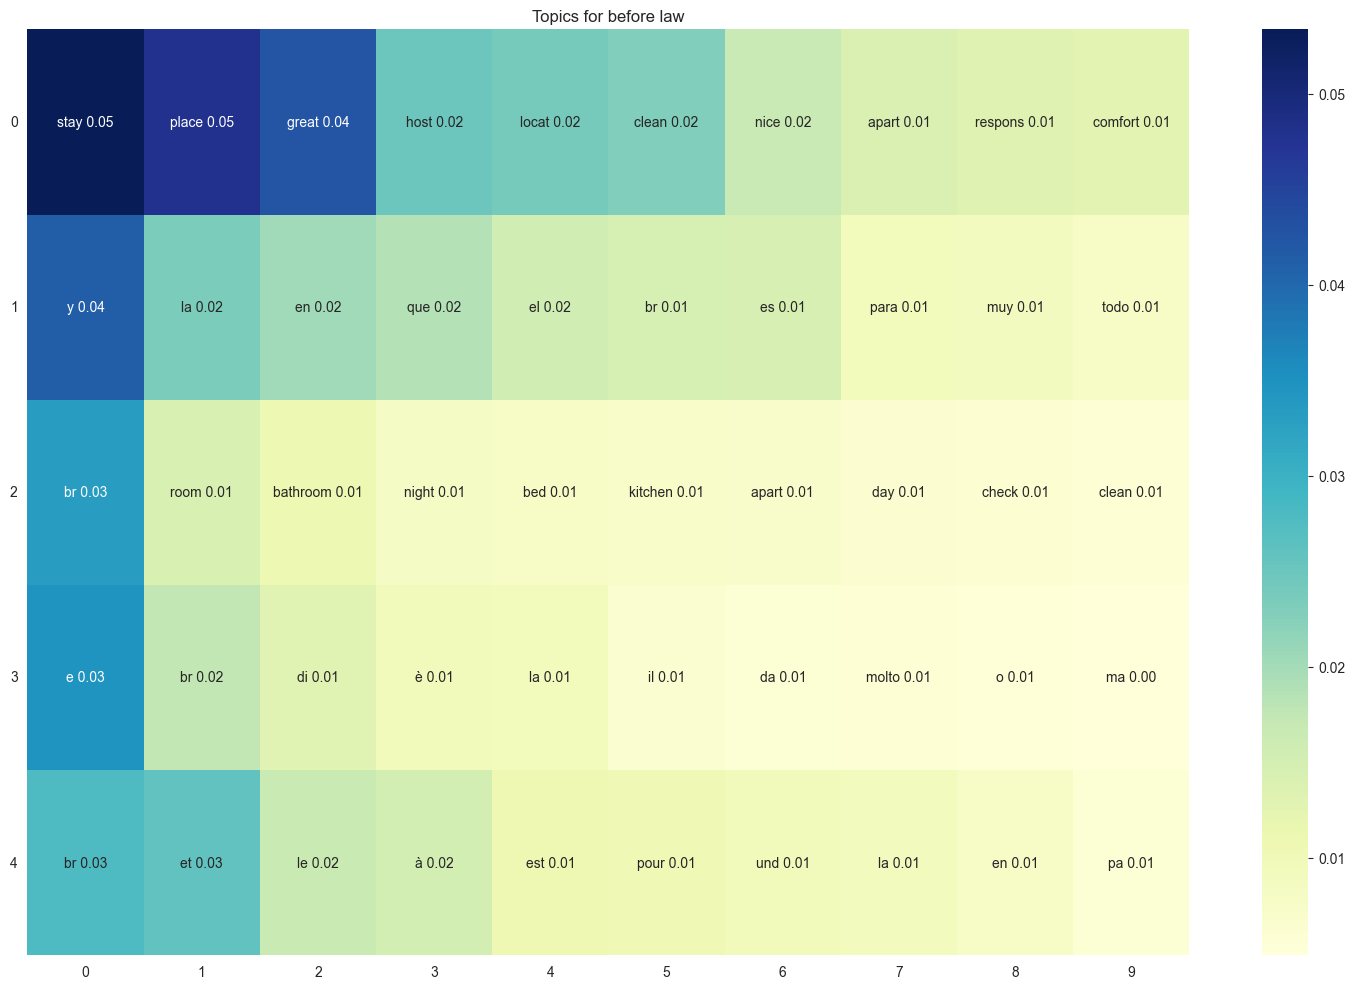

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Extracting top words for each topic and their weights
matrix = []
annotations = []
for topic in before_top_5_topics:
    words = topic[0][:10]
    row = []
    annot_row = []
    for weight, word in words:
        row.append(float(weight))
        annot_row.append(f"{word} {float(weight):.2f}")
    matrix.append(row)
    annotations.append(annot_row)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=np.array(annotations), fmt='', cmap="YlGnBu", cbar=True)
plt.title("Topics for before law")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

X and Y Axes: The heatmap is organized in a grid format, where each cell corresponds to a specific topic or combination of words.

Topic Labels: Inside each cell, there are one or more words, which are the dominant words or terms for that particular topic. Next to these words are numerical values that likely represent the weight or importance of that word within that topic.

Color Scale: The color gradient on the right side (ranging from blue to green) indicates the weight or prevalence of each topic. Darker blue shades represent higher values (e.g., 0.05), whereas the green shades represent lower values (e.g., 0.01). In this context, the darker blue might suggest that a topic was more dominant or prevalent in the data, while lighter green suggests it was less frequently mentioned.

Multilingual Data: The presence of words from multiple languages (e.g., English, Spanish, Italian) suggests that the dataset includes comments or reviews from various language speakers. This can indicate a diverse set of users or a platform with international reach.

Content Analysis:

The first row (labeled 0) seems to revolve around the experience of staying somewhere, with terms like "stay," "place," "great," "host," and "clean." It might refer to positive experiences at a place of accommodation.
The second row (labeled 1) includes words in Spanish and possibly some other languages, hinting at the international nature of the comments.
The third row (labeled 2) seems to revolve around specific aspects of accommodation, such as "room," "bathroom," "night," "bed," and "kitchen."
Subsequent rows continue to mix languages and topics, further emphasizing the multilingual and diverse nature of the dataset.
Overall Insight: The heatmap offers a snapshot of the main topics of discussion within the data. By visualizing topics in this manner, it becomes easier to quickly identify patterns, dominant themes, or shifts in conversation.

This kind of visualization can be incredibly useful for understanding user feedback, tracking changes over time, or identifying areas of interest or concern for a business or platform.

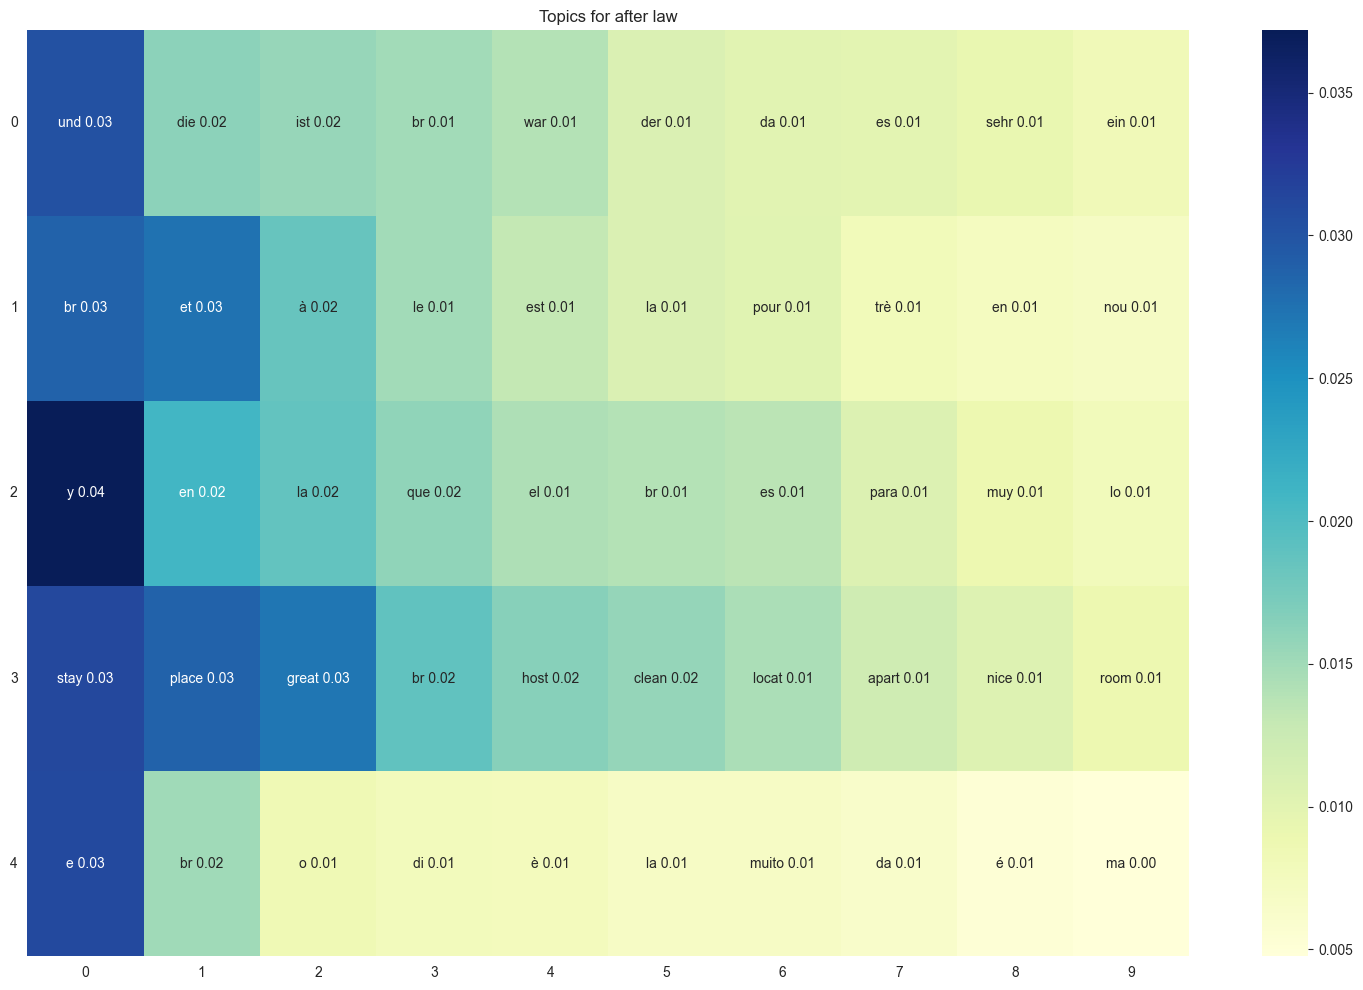

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Extracting top words for each topic and their weights
matrix = []
annotations = []
for topic in after_top_5_topics:
    words = topic[0][:10]
    row = []
    annot_row = []
    for weight, word in words:
        row.append(float(weight))
        annot_row.append(f"{word} {float(weight):.2f}")
    matrix.append(row)
    annotations.append(annot_row)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=np.array(annotations), fmt='', cmap="YlGnBu", cbar=True)
plt.title("Topics for after law")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

X and Y Axes: Similar to the previous heatmap, the grid layout indicates each cell corresponds to a specific topic or word combination.

Topic Labels: Within each cell are dominant words or terms for that specific topic. Numerical values next to these words likely show the word's weight or prominence within the topic.

Color Scale: The color gradient on the right (ranging from blue to green) illustrates the weight or prevalence of each topic. The blue shades are representative of higher values, while the green shades depict lower values.

Multilingual Data: Multiple languages are evident in the heatmap. Words from German (like "und," "die," "ist"), Spanish ("y," "en," "la"), French ("le," "est"), and possibly others are present. This reinforces the notion of a diverse, international dataset.

Content Analysis:

Row 0: Contains predominantly German words such as "und" (and), "die" (the), "ist" (is), suggesting it captures topics or comments predominantly in German.
Row 1: Features a mix of words from multiple languages, indicating diversity in this row of data.
Row 2: Dominated by Spanish words like "y" (and), "en" (in), "la" (the), indicating a prevalence of Spanish-language topics or comments in this row.
Row 3: Reflects topics akin to accommodations or experiences, with words like "stay," "place," "great," "host," and "clean". This might imply positive experiences or reviews regarding stays.
Row 4: Again shows a mix of languages, with words from various European languages.
Overall Insight: Like the earlier heatmap, this visualization offers a snapshot into the main themes within the data. It seems there's a wide variety of languages and topics, indicating a diverse range of comments or feedback. This heatmap can be invaluable for grasping user feedback or identifying dominant themes in a dataset.

Given its structure and content, this heatmap, combined with the previous one, can provide insights into patterns or shifts in conversation topics before a certain "law" came into effect. This might be particularly useful for understanding changes in sentiment or focus areas in response to regulatory changes or other significant events.

FINAL ANALYSIS:
For the topics created from the reviews in the pre law dataset and the post law dataset there doesnt seem to be a significant difference between the topics. 